<a href="https://colab.research.google.com/github/eleven111101/Support_Vector_Machine/blob/main/Water_Portability_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
print("heloo world")

heloo world


In [113]:
print("hello world")

hello world


In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
df=pd.read_csv("water_potability.csv")

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [117]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [118]:
df.isnull().sum().sort_values(ascending=False)

Sulfate            781
ph                 491
Trihalomethanes    162
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64

In [119]:
df.isnull().sum().sort_values(ascending=False)/len(df)*100

Sulfate            23.840049
ph                 14.987790
Trihalomethanes     4.945055
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Conductivity        0.000000
Organic_carbon      0.000000
Turbidity           0.000000
Potability          0.000000
dtype: float64

In [120]:
df.tail().sort_values(by="ph",ascending=False)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1


In [121]:
df.tail(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [122]:
df.shape

(3276, 10)

In [123]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


<Axes: >

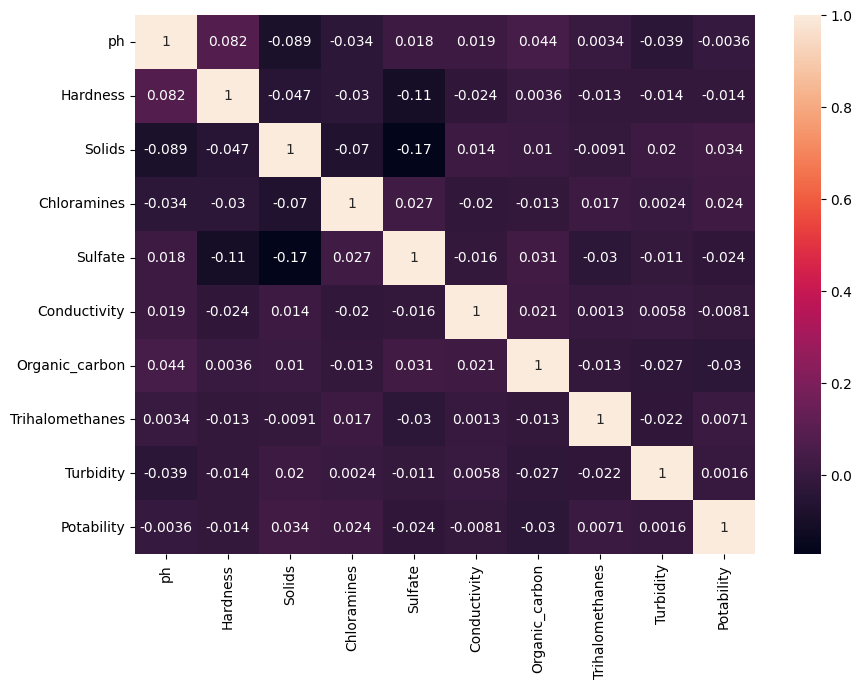

In [124]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [125]:
df[df.isna().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,76.485911,4.011718,0
...,...,...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,NaN,464.525552,11.083027,38.435151,4.906358,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [126]:
df[df.isnull().sum(axis=1) > 1]
M = df[df.isnull().sum(axis=1) > 1].count()
print("The missing count of rows is :\n",M)

The missing count of rows is :
 ph                  31
Hardness           160
Solids             160
Chloramines        160
Sulfate             17
Conductivity       160
Organic_carbon     160
Trihalomethanes    103
Turbidity          160
Potability         160
dtype: int64


In [127]:
df.shape

(3276, 10)

In [128]:
df = df[df.isnull().sum(axis=1) <= 1]

In [129]:
df.shape

(3116, 10)

In [130]:
df.isnull().sum(axis=0).sort_values(ascending=False)

Sulfate            638
ph                 362
Trihalomethanes    105
Hardness             0
Solids               0
Chloramines          0
Conductivity         0
Organic_carbon       0
Turbidity            0
Potability           0
dtype: int64

In [131]:
cols = ["Sulfate","ph","Trihalomethanes"]

In [132]:
df[cols].describe()

,Sulfate,ph,Trihalomethanes
count,2478.000000,2754.000000,3011.000000
mean,333.699670,7.078708,66.396269
std,41.308045,1.593966,16.154475
min,129.000000,0.000000,0.738000
25%,307.673973,6.090358,55.810006
50%,333.073455,7.037422,66.608891
75%,359.901349,8.062621,77.335028
max,481.030642,14.000000,124.000000


In [133]:
for cols in col:
  df[cols].fillna(df[cols].mean(),inplace=True)

In [134]:
df.isnull().sum(axis=0).sort_values(ascending=False)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [135]:
df.shape

(3116, 10)

In [143]:
df['Potability'] = df['Potability'].astype('category')

<ipython-input-150-0e40b348ec10>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df["Potability"],palette='Set2')


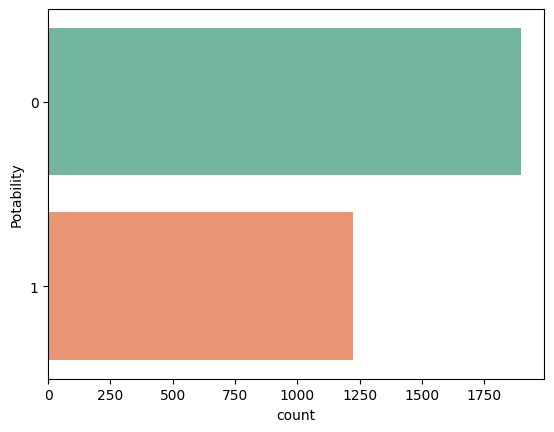

In [150]:
sns.countplot(df["Potability"],palette='Set2')
plt.show()

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3116 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ph               3116 non-null   float64 
 1   Hardness         3116 non-null   float64 
 2   Solids           3116 non-null   float64 
 3   Chloramines      3116 non-null   float64 
 4   Sulfate          3116 non-null   float64 
 5   Conductivity     3116 non-null   float64 
 6   Organic_carbon   3116 non-null   float64 
 7   Trihalomethanes  3116 non-null   float64 
 8   Turbidity        3116 non-null   float64 
 9   Potability       3116 non-null   category
dtypes: category(1), float64(9)
memory usage: 246.6 KB


In [151]:
X = df.drop("Potability",axis=1)
y = df["Potability"]

In [152]:
from sklearn.model_selection import train_test_split

In [154]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [155]:
from imblearn.over_sampling import SMOTE

In [157]:
smote = SMOTE(sampling_strategy='minority')

In [158]:
X_train,y_train = smote.fit_resample(X_train,y_train)

In [159]:
y_train.value_counts()

Potability
0    1249
1    1249
Name: count, dtype: int64

<ipython-input-162-63bafb2b01de>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y_train,palette='Set2')


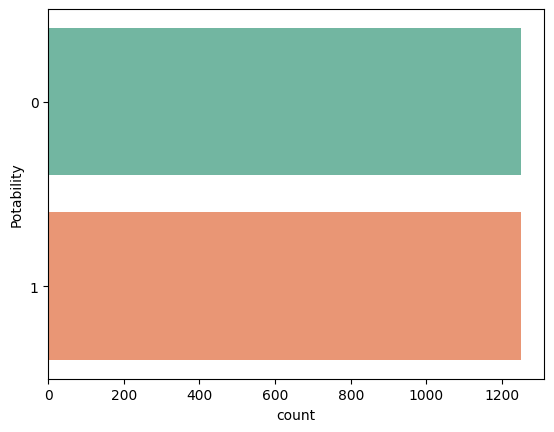

In [162]:
sns.countplot(y_train,palette='Set2')
plt.show()

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
scaler = StandardScaler()

In [165]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [166]:
from sklearn.svm import SVC

In [168]:
SVM = SVC()

In [171]:
SVM.fit(X_train,y_train)

SVC()

In [172]:
predictions = SVM.predict(X_test)

In [173]:
from sklearn.metrics import classification_report,confusion_matrix

In [177]:

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

print(f'Train Score: {SVM.score(X_train,y_train)*100}')
print(f'Test Score: {SVM.score(X_test,y_test)*100}')

[[450 196]
 [146 237]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.72       646
           1       0.55      0.62      0.58       383

    accuracy                           0.67      1029
   macro avg       0.65      0.66      0.65      1029
weighted avg       0.68      0.67      0.67      1029

Train Score: 74.93995196156925
Test Score: 66.76384839650146
